# GEOL 3910: draft lesson plan
Authors: Amanda Alexander, Tristan Caro, Kevin Rozmiarek

Due for GEOL 5042 October 30, 2020

## Outline + breakdown of tasks:
1. Introduce concept topic: stable isotope fractionation [**Tristan**]
2. Read in data and plot [**Tristan**]
3. Use least-squares method to derive fitting function [**Amanda**]
4. Use scipy to get fitting function [**Kevin**]
5. Add noise and compare with noise in fitting function [**Amanda**]
6. Discuss uncertainty [**Kevin**]
7. Discuss anthropogenic causes of carbon emissions based on stable isotope fractionation measurements [**Kevin**]

### Learning Goals
1. numpy arrays v pandas dataframes
2. import and use of scipy
3. fitting functions for datasets with least-squares method
4. describe origins and impacts of uncertainty
5. describe anthropogenic causes of incresed carbon emissions

## 1. Stable Isotope Fractionation

### 1.1 Background
All elements consist of protons, neutrons, and electrons. Elements are defined by their *atomic number*, the number of protons contained within their nucleus, such as Oxygen, whose atomic number is **8**. Often, elements can exist with the same atomic number, but a different number of neutrons. An atom with the same atomic number, but a differing number of neutrons, is defined as an **isotope**. Often, isotopes are radioactive and cause atomic decay. Carbon 14 $^{14}C$, for example, is Carbon 12 with two extra neutrons, leading it to have an atomic mass of 14. $^{14}C$ is radioactive and decays into Nitrogen 14 via [Beta Decay](https://www.esrl.noaa.gov/gmd/ccgg/isotopes/decay.html#:~:text=C%20decays%20by%20a%20process,rather%20than%20a%20carbon%20atom.). Atoms with differing numbers of neutrons that are *not* radioactive are called stable isotopes. $^{13}C$, for example, is a stable isotope of carbon.

Because stable isotopes of a given element have differing weights, they are often termed "light" or "heavy." This weight difference is often small (just the weight of one or two neutrons), but can be significant enough to cause changes in the reaction characteristics of molecules, especially when a reaction is mediated by biological enzymes. These differing reaction rates often lead to one isotope being preferentially reacted when compared to the other - this is known as **stable isotope fractionation**. Often times, but not always, biological systems "prefer" the light isotope of a given element, due to it having faster reaction kinetics than its heavy counterpart. In shorthand, scientists will often say "life prefers light." The result of this is that one can often search for the source of a compound of interest by looking at its isotopic composition *i.e.* does the isotopic composition of our compound of interest match that of a biological system or that of an abiotic reaction?

### Commonly Studied Stable Isotopes
A few commonly studied stable isotopes in biogeochemical systems are:
- $^2H$ : Deuterium, stable isotope of Hydrogen $^1H$
- $^{13}C$ : Carbon 13, stable isotope of Carbon $^{12}C$
- $^{15}N$ : Nitrogen 15, stable isotope of Nitrogen $^{14}N$
- $^{17}O$ : Oxygen 17, stable isotope of Oxygen $^{16}O$
- $^{18}O$ : Oxygen 18, stable isotope of Oxygen  $^{16}O$

### Delta Notation
Stable isotope fractionation is often written out using "delta" ($\delta$) notation. Delta notation is a ratio of ratios, where the ratios are those of one isotope to another. In other words:

$$
\delta = \frac{R_{sample} - R_{standard}}{R_{standard}}
$$

where $R_{sample}$ is the isotope ratio of the sample and  $R_{standard}$ is the isotope ratio of an international standard. In the case of Carbon, a common international standard is VPDB (Vienna Pee Dee Belemnite).

Delta notation is often expressed in "permil" $\textperthousand$. Similar to percent, delta values can be converted to permil by multiplying by 1000.

$$
\delta = \frac{R_{sample} - R_{standard}}{R_{standard}} * 1000
$$

### 1.2 Concept questions
1. Hydrogen isotopes $^1H$ and $^2H$ often fractionate more strongly in biological systems than those of Carbon $^{12}C$ and $^{13}C$. Why do you suspect this is the case?

2. Consider the made-up element *Bozium* that has two isotopes of heavy and light. What is the delta value of a sample whose istotope ratio (heavy/light) is .25, compared to an international Bozium standard that has an isotope ratio of .1?

## 2. Data Structures and Visualization

We will be using python to read, modify, and visualize our data.

### 2.1 Background
There are three packages, or libraries, that are important for data analysis in python. These are "numpy", "pandas", and "matplotlib".

You can import these into a python script using the following commands:

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt

pd, np, and plt are shorthand that allow us to call functions from these packages without referring to their full names.

### 2.2 Example
For brevity, we will only go through basic Pandas and Matplotlib syntax. For a more in-depth discussion on numpy, pandas, and matplotlib:
Numpy: https://numpy.org/devdocs/user/quickstart.html
Pandas: https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html
Matplotlib: https://matplotlib.org/tutorials/introductory/pyplot.html

#### Pandas
There are two main components of data in the `pandas` universe: series and Data Frames. A series is a list of numbers -- like a column. A Data Frame is multiple series, a collection of columns.

For example, we can define some data using a python dictionary:

In [2]:
data = {
        'customer': [1,2,3,4],
        'bananas': [5,12,2,4],
        'pears': [5,6,7,8]
}

And tell pandas to turn it into a `DataFrame`:

In [3]:
inventory = pd.DataFrame(data)
inventory

,customer,bananas,pears
0,1,5,5
1,2,12,6
2,3,2,7
3,4,4,8


The leftmost column is the index, and the two series we defined above are placed side-by-side.

We can now plot this data using matplotlib. Matplotlib can plot directly from pandas dataframes as follows:

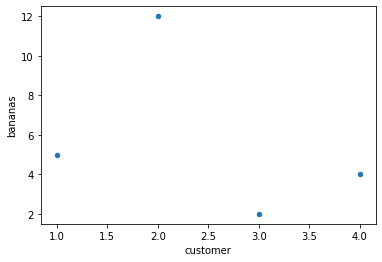

In [4]:
inventory.plot(kind = 'scatter', x = 'customer', y = 'bananas')

### 2.3 Practice Questions 


1. Using a python dictionary, write the temperature forecast for every day next week. HINT: Days of the week should be written as strings in quotes, within a python list e.g. `["Monday", "Tuesday", ...]`

2. Plot the forecast as a scatterplot using matplotlib

## 3. Least Squares

### 3.1 Background

**Submitted by Amanda**

Consider the data that you read in and plotted in the previous section. You could probably imagine drawing a line by eye through the majority of the points. But it is more accurate to calculate the line of best fit using the least squares method. The least squares regression method is an important application for fitting data. In this exercise, we will focus on the linear least squares. 

Recall the equation of a line:
$$y = mx+b$$
where $y$ is the dependent variable, $m$ is the slope, $x$ is the independent variable and $b$ is the y-intercept.

Now we want to compute the line that fits our data via the following steps:

1. For each (x,y) point calculate x2 and xy

2. Sum all x, y, x2 and xy ($\sum(x)$, $\sum(y)$, $\sum(xy)$ and $\sum(x^2)$)

3. Calculate Slope (m) as the following:

$$m = \frac{N\sum{(xy)} − \sum{x}\sum{y}}{N \sum{(x^2)} − (\sum{x^{2}})}$$

(Note: **N** is the number of points.)

4. Calculate the y-intercept (b):

$$b = \frac{\sum{y} − m\sum{x}}{N}$$

5. Assemble the equation of a line
$$ y = mx + b $$


### 3.2.1 Practice with least squares

Using the data from section two, follow the five steps of the least squares method to assemble the equation of a line. 

In [ ]:
#1. for each point compute x^2 and xy:

In [ ]:
#2. sum all x, y, x2 and xy

In [ ]:
#3. calculate slope
# it might be easiest to break this into a few parts
# first, let's work the numerator:

# next, the denomenator:

# finally, the fraction as a whole:

In [ ]:
# 4. calculate y-intercept

In [ ]:
# 5. assemble the equation

Great, now we have a line of best fit... built from (almost) hand!

### 3.2.2 Scipy example
**Submitted by Kevin**

So now you've built your own least squares method and used it to fit to your data and you've plotted it and that was awesome but implimenting it was kinda a pain wasn't it? Now that you've gone through this process, you can appreciate the value of programs that do that heavy lifting for you.

[Scipy](https://www.scipy.org/) is a self-described "ecosystem" of packages and libraries that have a great number of the tools that you will use as a scientist/geologist. In the software world, we would call this a **stack** or series of interdependent programs that build on themselves to perform tasks. Scipy is open source meaning that it is maintained by passionate community memebers invested in it's success. We are going to utilze Scipy to do what we did above in a few lines.

In [5]:
#Import the library
import matplotlib.pyplot as plt
import numpy as np #Can be removed because it will be used previously
from scipy import stats

In [6]:
#Making up some data
np.random.seed(12345678) #THIS CAN BE CHANGED TO THE PREVIOUS DATA STRUCTURE EXAMPLES
x = np.random.random(10)
y = 1.6*x + np.random.random(10)

In [7]:
#Doing all that work in ONE line
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("slope: %f    intercept: %f" % (slope, intercept))

slope: 1.944864    intercept: 0.268578


In [8]:
print("R-squared: %f" % r_value**2)

R-squared: 0.735498


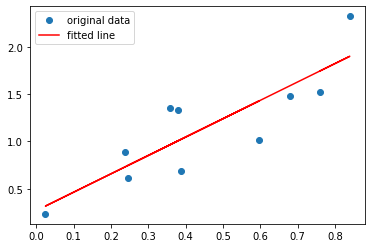

In [9]:
#Using our new plotting skills, lets plot our original data vs our fit
plt.plot(x, y, 'o', label='original data')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.legend()
plt.show()

Pretty easy huh?

### 3.3 Practice Questions

**3.3.1** question text here

## 4. Uncertainty and Noise

### 4.1 Background
**Kevin to submit**

### 4.2 Example
**Amanda to submit**

### 4.3 Practice Questions
**Amanda to submit**

**4.3.1** question text here

## 5. Summary and big picture example: Stable Isotopes of the Carbon Cycle
**Kevin still working on**

**Some text introducing the CO2 in the carbon cycle here**

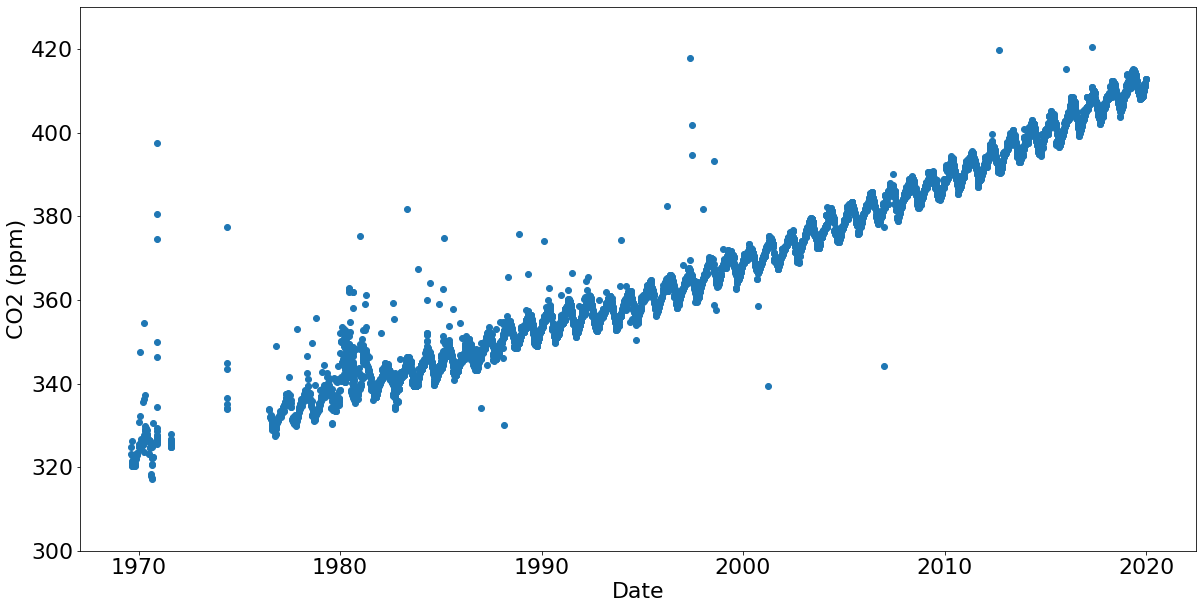

In [40]:
co2ppm_Data =  pd.read_csv('data/co2_mlo_surface-flask_1_ccgg_event.txt',delim_whitespace=True)

co2ppm_Dates_col = [co2ppm_Data['sample_year'],co2ppm_Data['sample_month'],co2ppm_Data['sample_day']]
co2ppm_Dates = pd.concat(co2ppm_Dates_col, axis=1)
co2ppm_Dates.columns = ['year', 'month','day']
co2ppm_DateTime = pd.to_datetime(co2ppm_Dates)

co2ppm_co2 = co2ppm_Data['analysis_value']


plt.plot(co2ppm_DateTime, co2ppm_co2, 'o')
plt.rcParams['figure.figsize'] = [20,10]
plt.rcParams.update({'font.size':22})
plt.ylim(300, 430)
plt.xlabel('Date')
plt.ylabel('CO2 (ppm)')
plt.show()

**Some text introducing the stable isotopes of CO2 here**

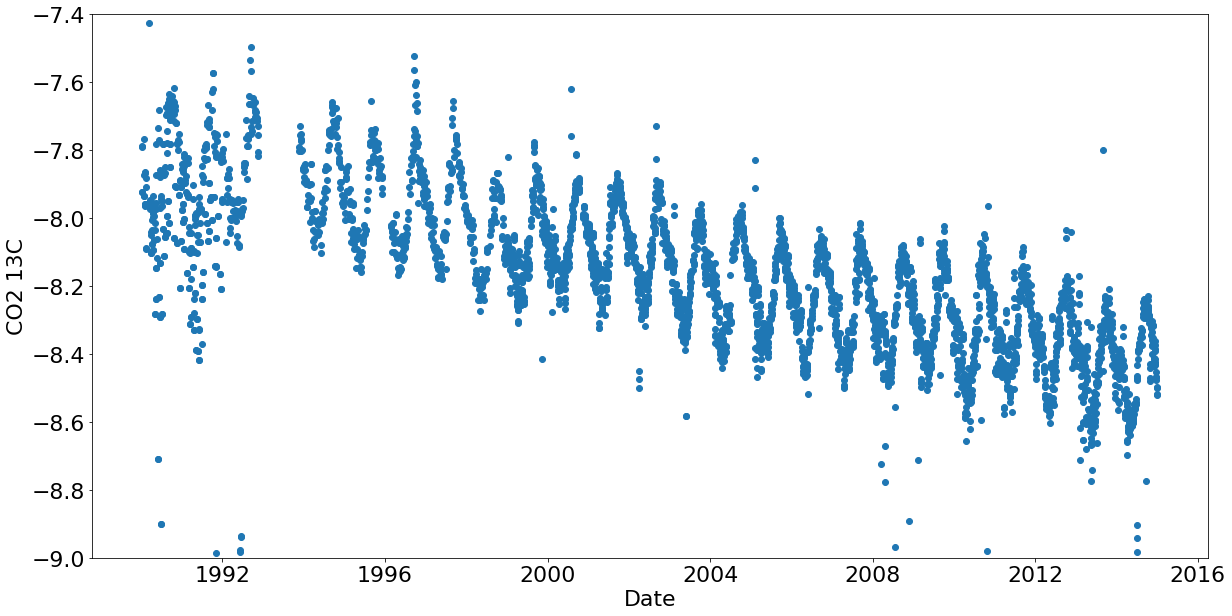

In [43]:
co2c13_Data =  pd.read_csv('data/co2c13_mlo_surface-flask_1_sil_event.txt',delim_whitespace=True)

co2c13_Dates_col = [co2c13_Data['sample_year'],co2c13_Data['sample_month'],co2c13_Data['sample_day']]
co2c13_Dates = pd.concat(co2c13_Dates_col, axis=1)
co2c13_Dates.columns = ['year', 'month','day']
co2c13_DateTime = pd.to_datetime(co2c13_Dates)

co2c13_co2 = co2c13_Data['analysis_value']


plt.plot(co2c13_DateTime, co2c13_co2, 'o')
plt.rcParams['figure.figsize'] = [20,10]
plt.rcParams.update({'font.size':22})
plt.ylim(-9, -7.4)
plt.xlabel('Date')
plt.ylabel('CO2 13C')
plt.show()

### 5.1 Summary questions
**Kevin to submit**